# Placing borrowing events

In [1]:
# code
import sys; sys.path.insert(0,'..')
from geotaste.imports import *

## Method

In [2]:

# prune_when_dwelling_matches??

In [3]:
# get data
df = Combined().gen(save=True)
# df = Combined().data

Locating events: 100%|██████████| 21063/21063 [00:46<00:00, 454.23it/s]


In [33]:
cols=TCOLS + [c for c in df if c.startswith('dwelling') and c not in set(TCOLS) and c!='dwelling_excluded']

In [37]:
df[df.member=='foltz'][cols].set_index('event')

,dwelling,event_start,event_end,dwelling_start,dwelling_end,dwelling_address,dwelling_city,dwelling_matchfound,dwelling_matchtype,dwelling_numposs,dwelling_likelihood
event,,,,,,,,,,,
E17378,foltz;48.85693;2.34254;;,1935-09-30,1935-11-14,,,31 quai de l'Horloge,Paris,True,Ambiguous (Colens),2.0,0.5
E17378,foltz;48.8409;2.33605;;,1935-09-30,1935-11-14,,,12 avenue de l'Observatoire,Paris,True,Ambiguous (Colens),2.0,0.5


In [21]:
df[df.member=='hartmann'][TCOLS+['dwelling_matchtype','dwelling_excluded']]

,event,dwelling,event_start,event_end,dwelling_start,dwelling_end,dwelling_matchtype,dwelling_excluded
17155,E00200,hartmann;48.84346;2.34665;;,1955,1955-05-10,,,Singular,False
17156,E29896,hartmann;48.84346;2.34665;;,1952-06-20,,,,Singular,False
17157,E29897,hartmann;48.84346;2.34665;;,1952-06-20,,,,Singular,False
17158,E29895,hartmann;48.84346;2.34665;;,1952-06-20,,,,Singular,False
17160,E29898,hartmann;48.84346;2.34665;;,1952-06-20,,,,Singular,False
17161,E29919,hartmann;48.84346;2.34665;;,1953-11-25,1953-12-11,,,Singular,False
17162,E29920,hartmann;48.84346;2.34665;;,1953-11-25,1953-12-11,,,Singular,False
17163,E29899,hartmann;48.84346;2.34665;;,1952-06-20,,,,Singular,False


## Results

### How many events can be precisely assigned to locations/dwellings?

These were limited to borrow events. 

Key for list below:
* `Ambiguous` = Event was assigned multiple dwelling possibilities
* `Singular` = Event was assigned one dwelling possibility, but only because just one existed
* `Exact` = An exact match was found for event (its start or end date happened during a dwelling possibility with known start and end dates)
* `Exact (excl.)` = A dwelling possility excluded because an exact match was possible but not found
* `NA` = not an event (i.e. rows in dataframe with no event, like members with no borrowing records).


In [22]:
df.groupby('dwelling_matchtype').event.nunique().sort_values(ascending=False)

dwelling_matchtype
Singular               10708
Ambiguous (Colens)      6297
Exact                   2910
Ambiguous (Raphael)      925
NA                         1
Name: event, dtype: int64

In [6]:
df[df.dwelling_matchtype=="Heuristic (excl. by distance)"].groupby('dwelling_city').event.nunique().sort_values(ascending=False)

Series([], Name: event, dtype: int64)

In [7]:
# df[df.dwelling_matchtype=='?'][TCOLS]

In [23]:
df[df.dwelling_matchtype=='Ambiguous (Colens)'].groupby('member').event.nunique().sort_values(ascending=False).to_csv('/Users/ryan/Documents/data.ambigcolens.csv')

In [24]:
df[df.dwelling_matchtype=='Ambiguous (Raphael)'].groupby('member').event.nunique().sort_values(ascending=False).to_csv('/Users/ryan/Documents/data.ambigraphael.csv')

In [10]:
df[df.event=='E17954'][TCOLS]

,event,dwelling,event_start,event_end,dwelling_start,dwelling_end
790,E17954,baldwin-helen-green;48.86922;2.29787;1937-06-1...,1936-01-07,1936-03-05,1937-06-11,1937-06-11


In [11]:

# What is range of usual number of possibilites?
df[df.dwelling_matchtype=='Ambiguous'].dwelling_numposs.astype(int).value_counts()

Series([], Name: count, dtype: int64)

<Axes: ylabel='Density'>

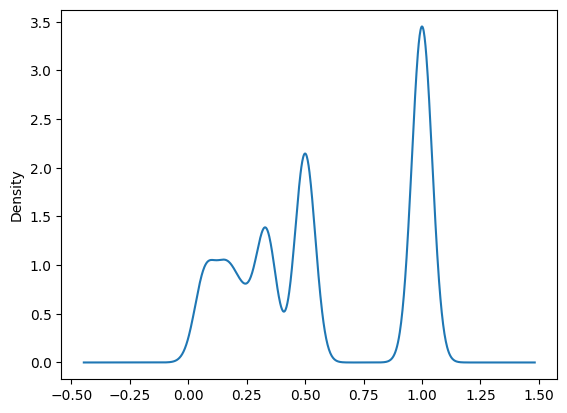

In [38]:
df.dwelling_likelihood.plot.density()

### Who are the top offenders?


### Types of offenses

* Colens problem: no time data for dwellings -> allow all (which survive the distance, etc filters)
* Raphael problem: time data for some dwellings, some events in the gaps between
    * 5 -> 2 are excluded from being out of Paris -> 1 we know for being too far into future
* American Express problem: if only address, keep it; if 1 of n, remove it

In [12]:
# get top 25 offenders
num_ambig_events = df[df.dwelling_matchtype=='Ambiguous'].groupby('member').event.nunique().sort_values(ascending=False)
num_ambig_events.head(25)

Series([], Name: event, dtype: int64)

#### Case study: France Raphael

In [13]:
# Which dwellings do we have for France Raphael?
Dwellings().data.query('member=="raphael-france"').sort_values('dwelling_start')

,member,dwelling,arrond,dwelling_start,dwelling_end,dwelling_address,dwelling_city,lat,lon
2850,raphael-france,raphael-france;43.41666;6.83739;;,,,,,Saint-Raphaël,43.41666,6.83739
2852,raphael-france,raphael-france;48.80546;2.44419;;,,,,1 rue Traverse Brest,Brest,48.80546,2.44419
2849,raphael-france,raphael-france;48.84855;2.30906;1921-01-01;192...,7,1921-01-01,1929-03-01,40 avenue de Saxe,Paris,48.84855,2.30906
2853,raphael-france,raphael-france;48.83944;2.33348;1929-04-01;193...,14,1929-04-01,1937-07-01,18 rue Boissonade,Paris,48.83944,2.33348
2851,raphael-france,raphael-france;48.83871;2.33253;1937-08-01;195...,14,1937-08-01,1959-01-01,40 rue Boissonade,Paris,48.83871,2.33253


In [14]:
# For start 
Dwellings().data.query('dwelling_start!="" & dwelling_end!=""')


,member,dwelling,arrond,dwelling_start,dwelling_end,dwelling_address,dwelling_city,lat,lon
152,baldwin-helen-green,baldwin-helen-green;;;1935-04-01;1935-04-01,,1935-04-01,1935-04-01,,Montreux,,
153,baldwin-helen-green,baldwin-helen-green;;;1937-07-01;1937-07-01,,1937-07-01,1937-07-01,,Saint-Malo,,
154,baldwin-helen-green,baldwin-helen-green;48.86922;2.29787;1937-06-1...,16,1937-06-11,1937-06-11,30 rue de Bassano,Paris,48.86922,2.29787
201,barlett-jessie,barlett-jessie;48.84928;2.32841;1923-09-01;192...,6,1923-09-01,1923-12-01,14 rue d'Assas,Paris,48.84928,2.32841
243,beckett,beckett;48.84184;2.34403;1928-10-01;1930-09-01,5,1928-10-01,1930-09-01,45 rue d'Ulm,Paris,48.84184,2.34403
...,...,...,...,...,...,...,...,...,...
3216,ybarra-penny,ybarra-penny;48.86658;2.30844;1935-01-15;1936-...,8,1935-01-15,1936-04-19,12 rue Jean Goujon,Paris,48.86658,2.30844
3217,ybarra-penny,ybarra-penny;48.87583;2.30041;1936-06-10;1936-...,8,1936-06-10,1936-06-28,37 avenue Hoche,Paris,48.87583,2.30041
3218,yeats-anne,yeats-anne;48.85092;2.33845;1947-01-01;1947-01-01,6,1947-01-01,1947-01-01,12 rue de l'Odéon,Paris,48.85092,2.33845
3219,yeats-anne,yeats-anne;48.83638;2.32014;1937-01-01;1938-01-01,14,1937-01-01,1938-01-01,18 rue du Moulin de Beurre,Paris,48.83638,2.32014


In [15]:
df.query('dwelling_matchtype=="Ambiguous"')[TCOLS]

,event,dwelling,event_start,event_end,dwelling_start,dwelling_end


In [16]:
df[df.event=='E26192'][TCOLS+['book','member']]

,event,dwelling,event_start,event_end,dwelling_start,dwelling_end,book,member
114,E26192,antoine-may;48.84899;2.33354;;,1939-12-12,1940-02-22,,,carr-wake-dead,antoine-may
248,E26192,antoine-may;48.85471;2.31929;;,1939-12-12,1940-02-22,,,carr-wake-dead,antoine-may
382,E26192,antoine-may;48.84564;2.33225;;,1939-12-12,1940-02-22,,,carr-wake-dead,antoine-may


In [17]:
Dwellings().data.query('member=="antoine-may"')

,member,dwelling,arrond,dwelling_start,dwelling_end,dwelling_address,dwelling_city,lat,lon
69,antoine-may,antoine-may;48.84899;2.33354;;,6,,,52 rue de Vaugirard,Paris,48.84899,2.33354
70,antoine-may,antoine-may;48.85471;2.31929;;,7,,,63 rue de Varenne,Paris,48.85471,2.31929
71,antoine-may,antoine-may;48.84564;2.33225;;,6,,,38 rue Guynemer,Paris,48.84564,2.33225


In [18]:
# How many unique events ambiguous for France Raphael?
df[df.member=="raphael-france"].groupby('dwelling_matchtype').event.nunique()

dwelling_matchtype
Ambiguous (Raphael)      9
Exact                  990
Name: event, dtype: int64

In [19]:
df[df]

ValueError: Boolean array expected for the condition, not object

In [ ]:
df.query('dwelling_matchtype=="Ambiguous" & member=="raphael-france"')[TCOLS].set_index(['event']).sort_index()

,dwelling,event_start,event_end,dwelling_start,dwelling_end
event,,,,,
E10001,raphael-france;43.41666;6.83739;;,1929-03-02,1929-03-08,,
E10001,raphael-france;48.84855;2.30906;1921-01-01;192...,1929-03-02,1929-03-08,1921-01-01,1929-03-01
E10001,raphael-france;48.83871;2.33253;1937-08-01;195...,1929-03-02,1929-03-08,1937-08-01,1959-01-01
E10001,raphael-france;48.80546;2.44419;;,1929-03-02,1929-03-08,,
E10001,raphael-france;48.83944;2.33348;1929-04-01;193...,1929-03-02,1929-03-08,1929-04-01,1937-07-01
E10027,raphael-france;48.84855;2.30906;1921-01-01;192...,1929-03-08,1929-03-11,1921-01-01,1929-03-01
E10027,raphael-france;48.80546;2.44419;;,1929-03-08,1929-03-11,,
E10027,raphael-france;48.83944;2.33348;1929-04-01;193...,1929-03-08,1929-03-11,1929-04-01,1937-07-01
E10027,raphael-france;48.83871;2.33253;1937-08-01;195...,1929-03-08,1929-03-11,1937-08-01,1959-01-01


In [ ]:
df.query('event!="" & dwelling==""')[['member']+TCOLS]

,member,event,dwelling,event_start,event_end,dwelling_start,dwelling_end
626,prevost-marcelle-auclair,E12247,,1931-07-17,1931-11-16,,
5320,church-barbara,E23324,,1938-09-13,1938-09-19,,
5321,church-barbara,E23597,,1938-11-04,1938-11-09,,
5322,church-barbara,E25240,,1939-05-17,1939-05-22,,
5323,church-barbara,E23377,,1938-10-03,1938-10-11,,
...,...,...,...,...,...,...,...
63435,worthing-13,E20471,,1937-04-02,1937-04-08,,
63436,worthing-13,E20796,,1937-05-19,1937-05-28,,
63437,worthing-13,E20842,,1937-05-27,1937-06-03,,
64572,,E29812,,1946-12-04,,,


In [ ]:
Dwellings().data.query('member=="prevost-marcelle-auclair"')

,member,dwelling,arrond,dwelling_start,dwelling_end,dwelling_address,dwelling_city,lat,lon
